In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('stylesheet.mplstyle')

# Set color variables to make colors easier later
lightblue = '#54d2d2'
yellow = '#ffcb00'
orange = '#f8aa4b'
pink = '#ff6150'
gray = '#a89cac'

In [2]:
# numbers for ionizing photon output from Goetberg+18 table B.2
Mstrip = np.array([0.39,0.44,0.5,0.58,0.67,0.76,0.87,1.0,1.15,1.3,1.49,1.67,1.92,2.21,2.53,2.91,3.36,3.87,4.45,5.13,5.89,6.61,7.23])
log10_Q0 = np.array([41.9,42.4,43.0,44.1,44.8,45.3,45.7,46.1,46.4,46.6,46.8,47.0,47.2,47.4,47.6,47.8,47.9,48.1,48.3,48.5,48.6,48.7,48.8])
log10_Q2 = np.array([31.2,33.6,36.8,37.7,38.9,39.5,39.2,38.8,40.1,40.5,41.2,42.4,42.1,43.3,43.7,44.0,44.3,44.7,45.0,45.3,45.6,46.0,46.4])

In [3]:
# simple line equation for curve fitting
def line(x, a, b):
    return a * x + b

# Figure 7

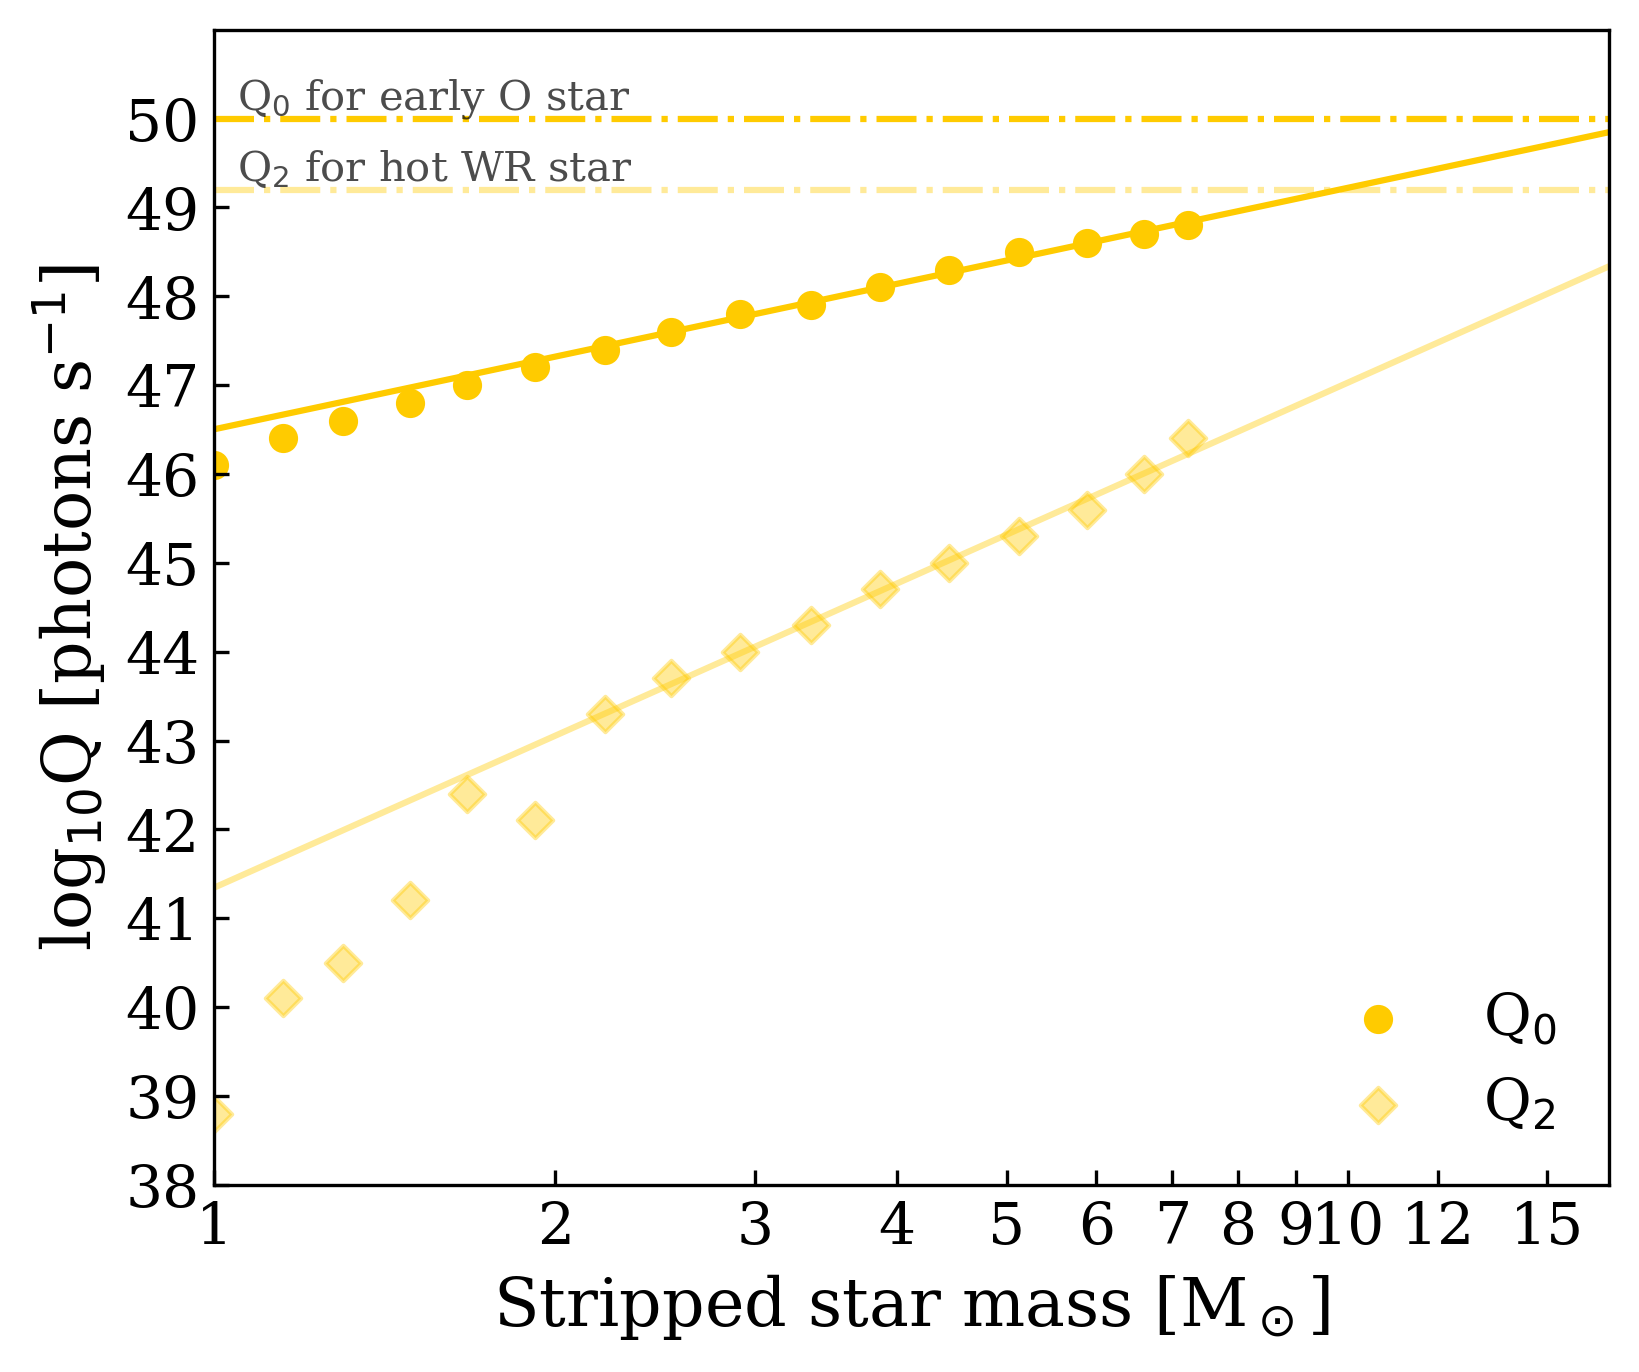

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# plot H-ionizing photons (Q0) as a function of mass
ax.scatter(np.log10(Mstrip), log10_Q0, c=yellow, label=r'Q$_0$')
# fit the data for M_strip > 2 Msun to a straight line
x = np.array([np.log10(1), np.log10(17)])
mask = (Mstrip > 2)
popt, pcov = curve_fit(line, np.log10(Mstrip[mask]), log10_Q0[mask])
ax.plot(x, line(x, *popt), c=yellow, ls='-')

# plot He+-ionizing photons (Q2) as a function of mass
ax.scatter(np.log10(Mstrip), log10_Q2, c=yellow, alpha=0.4, marker='D', label=r'Q$_2$')
# fit the data for M_strip > 2 Msun to a straight line
mask = (Mstrip > 2)
popt2, pcov2 = curve_fit(line, np.log10(Mstrip[mask]), log10_Q2[mask])
ax.plot(x, line(x, *popt2), c=yellow, ls='-', alpha=0.4)

# axis formatting
ax.set_xlabel(r'Stripped star mass [M$_\odot$]')
ax.set_ylabel(r'log$_{10}$Q [photons s$^{-1}$]')

# ax.grid(ls=':')

xticks = [*np.linspace(1, 10, 10), 12, 15]
ax.set_xticks(np.log10(xticks))
ax.set_xticklabels([str(int(x)) for x in xticks])

yticks = np.linspace(38, 50, 13)
ax.set_yticks(yticks)
ax.set_yticklabels([str(int(y)) for y in yticks])

ax.set_xlim(*x)
ax.set_ylim(38, 51)

# plot a horizontal line for Q2 for a hot WR star from Smith+02
ax.axhline(49.2, c=yellow, ls='-.', alpha=0.4)
ax.text(0.02, 49.3, r'Q$_2$ for hot WR star', fontsize=10, alpha=0.7)
# plot a horizontal line for Q0 for an early O star from Smith+02
ax.axhline(50, c=yellow, ls='-.')
ax.text(0.02, 50.1, r'Q$_0$ for early O star', fontsize=10, alpha=0.7)

plt.legend()

plt.savefig('Q_fit.png', bbox_inches='tight')

# Convolve with mass distribution to estimate total ionizing photon output from hot stripped stars

In [5]:
nbin = 1000
bins = np.geomspace(1, 50, nbin)
# mask only the mass range where we're applying the best fit calculated above
binmask = (bins > 8.5)*(bins < 17)

# load the MW and SMC data, keeping only the ones in the bins above the drop and below the WR cutoff
mwhists = np.genfromtxt('../data/histograms/hist_Z014.txt')[:,binmask]
smchists = np.genfromtxt('../data/histograms/hist_Z002.txt')[:,binmask]

# calculate the Q0 of a stripped star with the mass of each bin
Q0_bin = 10**(line(np.log10(bins[binmask]), *popt))

# multiply by the number of stripped stars in each bin to get the Q0 from each bin
Q0_in_each_bin_mw = mwhists * Q0_bin
Q0_in_each_bin_smc = smchists * Q0_bin

print('Q0:')
# total Q0 from entire population between 7.23 < M < 17 Msun
total_Q0_bin_mw = np.sum(Q0_in_each_bin_mw, axis=1)
Q0_mw_mean = np.mean(np.log10(total_Q0_bin_mw))
print(f'Without drop, total is log_10(Q0) = {Q0_mw_mean:.1f} +- {np.std(np.log10(total_Q0_bin_mw)):.2f}')
total_Q0_bin_smc = np.sum(Q0_in_each_bin_smc, axis=1)
Q0_smc_mean = np.mean(np.log10(total_Q0_bin_smc))
print(f'With drop, total is log_10(Q0) = {Q0_smc_mean:.1f} +- {np.std(np.log10(total_Q0_bin_smc)):.2f}')

Q0:
Without drop, total is log_10(Q0) = 52.0 +- 0.02
With drop, total is log_10(Q0) = 51.4 +- 0.05


In [6]:
# calculate the Q2 of a stripped star with the mass of each bin
Q2_bin = 10**(line(np.log10(bins[binmask]), *popt2))

# multiply by the number of stripped stars in each bin to get the Q0 from each bin
Q2_in_each_bin_mw = mwhists * Q2_bin
Q2_in_each_bin_smc = smchists * Q2_bin

print('Q2:')
# total Q2 from entire population between 7.23 < M < 17 Msun
total_Q2_bin_mw = np.sum(Q2_in_each_bin_mw, axis=1)
Q2_mw_mean = np.mean(np.log10(total_Q2_bin_mw))
print(f'Without drop, total is log_10(Q2) = {Q2_mw_mean:.1f} +- {np.std(np.log10(total_Q2_bin_mw)):.2f}')
total_Q2_bin_smc = np.sum(Q2_in_each_bin_smc, axis=1)
Q2_smc_mean = np.mean(np.log10(total_Q2_bin_smc))
print(f'With drop, total is log_10(Q2) = {Q2_smc_mean:.1f} +- {np.std(np.log10(total_Q2_bin_smc)):.2f}')

Q2:
Without drop, total is log_10(Q2) = 50.1 +- 0.04
With drop, total is log_10(Q2) = 49.4 +- 0.08


# Figure 8

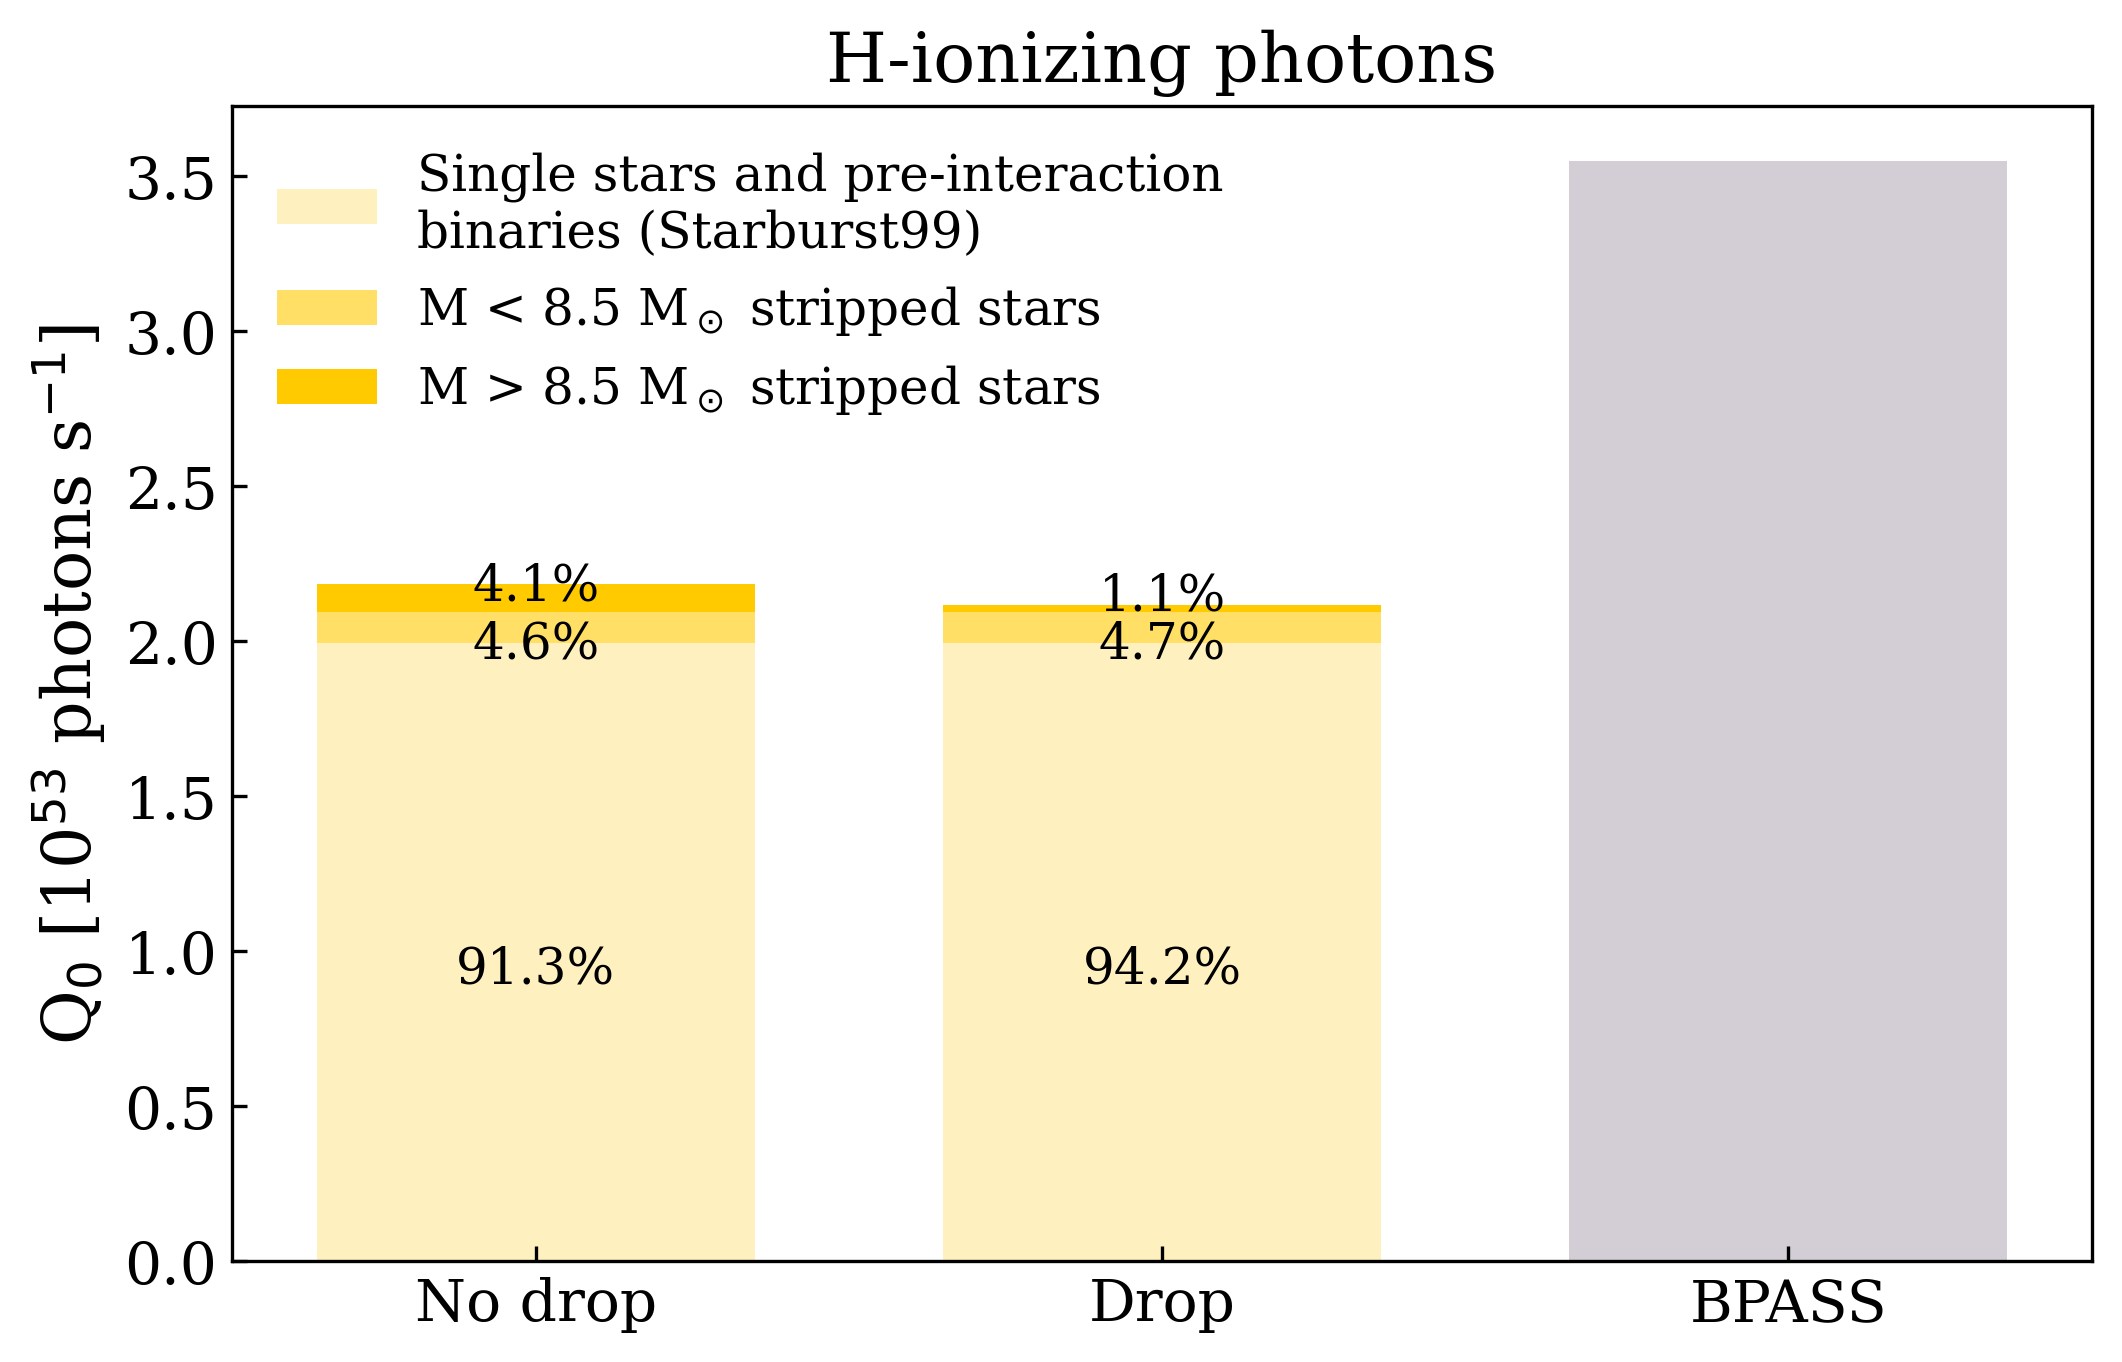

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

xlabels = ['No drop', 'Drop', 'BPASS']

counts = {
    # starburst99 and M_strip < 8.5 Msun results from Gotberg+19 Table A.3
    'Single stars and pre-interaction\nbinaries (Starburst99)': np.array([10**53.3, 10**53.3, 0.]),
    r'M < 8.5 M$_\odot$ stripped stars': np.array([10**52, 10**52, 0.]),
    # M_strip > 8.5 Msun results from our calculation above
    r'M > 8.5 M$_\odot$ stripped stars': np.array([10**Q0_mw_mean, 10**Q0_smc_mean, 0.]),
}

# get the percentage labels to put on the bar segments
twocoldata = np.array(list(counts.values()))[:,:2]
barlabels = twocoldata / np.sum(twocoldata, axis=0) * 100
barlabels_percent = [[*[f'{a:.1f}%' for a in row],''] for row in barlabels]
barlabels_percent[-1] = [f'{a}\n' for a in barlabels_percent[-1]]

width = 0.7
bottom = np.zeros(3)
for i, (startype, count) in enumerate(counts.items()):
    p = ax.bar(xlabels, count/1e53, width, label=startype, bottom=bottom, color=yellow, alpha=[.25,.6,1][i])
    bottom = bottom + count/1e53
    ax.bar_label(p, labels=barlabels_percent[i], label_type='center', size=12, padding=-4)

# add BPASS results from Stanway+16 for comparison
ax.bar(xlabels, [0, 0, 10**53.55/1e53], width, color=gray, alpha=0.5)

# axis formatting
ax.set_ylabel(r'Q$_0$ [10$^{53}$ photons s$^{-1}$]')
ax.set_title('H-ionizing photons')
ax.legend(fontsize=12)

plt.savefig('Q0.png', bbox_inches='tight')

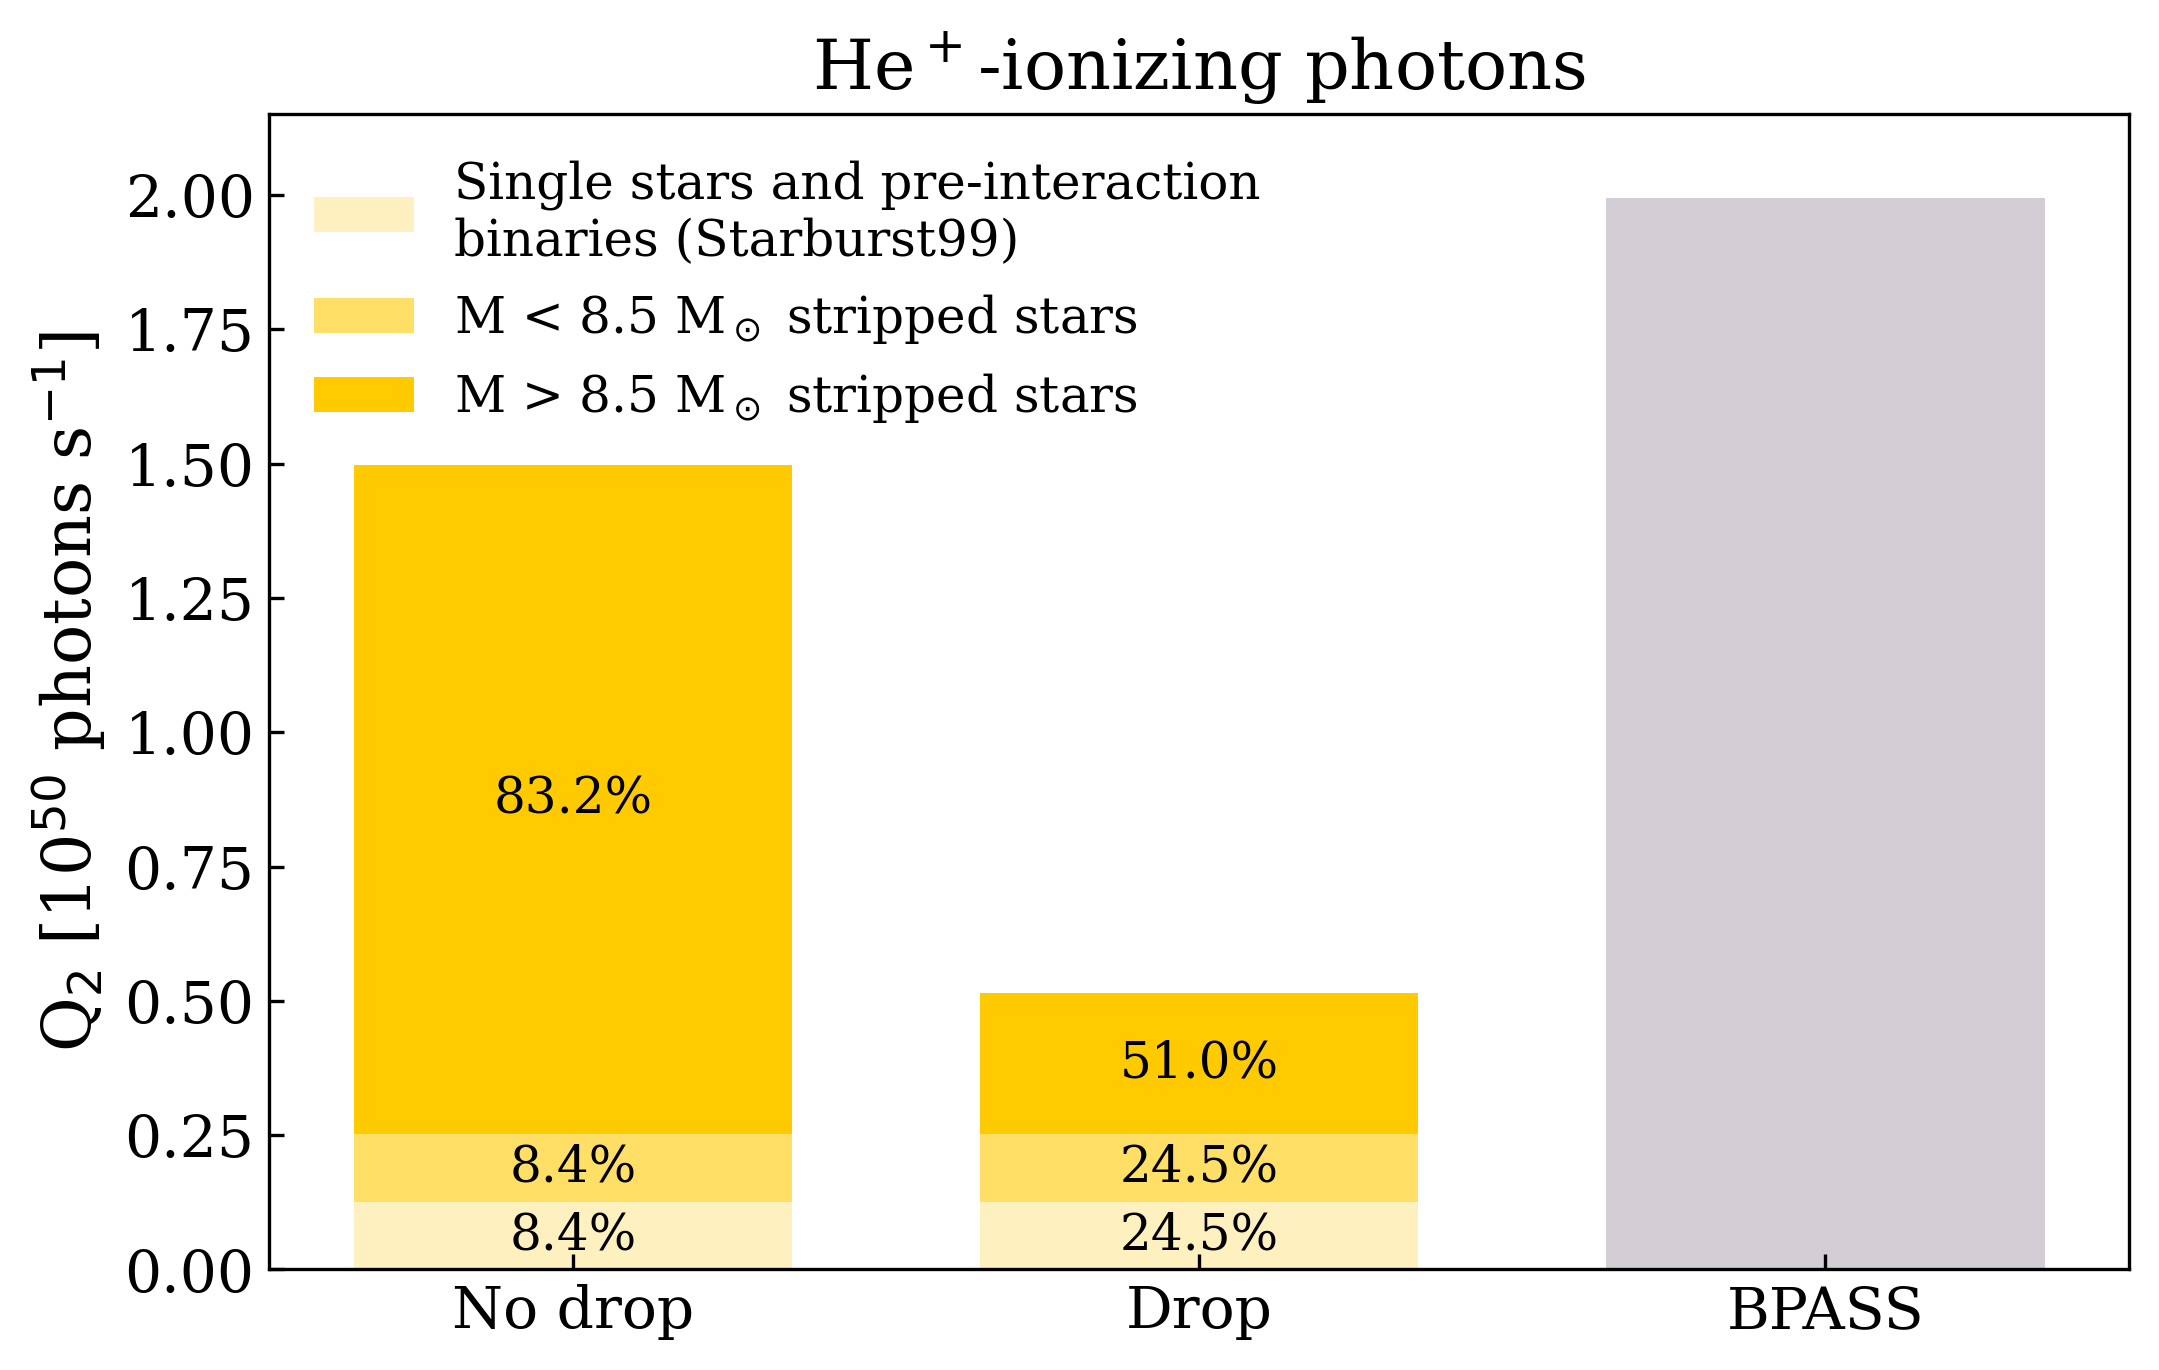

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

xlabels = ['No drop', 'Drop', 'BPASS']


counts = {
    # starburst99 and M_strip < 8.5 Msun results from Gotberg+19 Table A.3
    'Single stars and pre-interaction\nbinaries (Starburst99)': np.array([10**49.1, 10**49.1, 0.]),
    r'M < 8.5 M$_\odot$ stripped stars': np.array([10**49.1, 10**49.1, 0.]),
    # M_strip > 8.5 Msun results from our calculation above
    r'M > 8.5 M$_\odot$ stripped stars': np.array([10**Q2_mw_mean, 10**Q2_smc_mean, 0.]),
}

# get the percentage labels to put on the bar segments
twocoldata = np.array(list(counts.values()))[:,:2]
barlabels = twocoldata / np.sum(twocoldata, axis=0) * 100
barlabels_percent = [[*[f'{a:.1f}%' for a in row],''] for row in barlabels]

width = 0.7
bottom = np.zeros(3)
for i, (startype, count) in enumerate(counts.items()):
    p = ax.bar(xlabels, count/1e50, width, label=startype, bottom=bottom, color=yellow, alpha=[.25,.6,1][i])
    bottom = bottom + count/1e50
    ax.bar_label(p, labels=barlabels_percent[i], label_type='center', size=12)

# add BPASS results from Stanway+16 for comparison
ax.bar(xlabels, [0, 0, 10**50.3/1e50], width, color=gray, alpha=0.5)

# axis formatting
ax.set_ylabel(r'Q$_2$ [10$^{50}$ photons s$^{-1}$]')
ax.set_ylim(0, 2.15)
ax.set_title(r'He$^+$-ionizing photons')
ax.legend(fontsize=12)

plt.savefig('Q2.png', bbox_inches='tight')